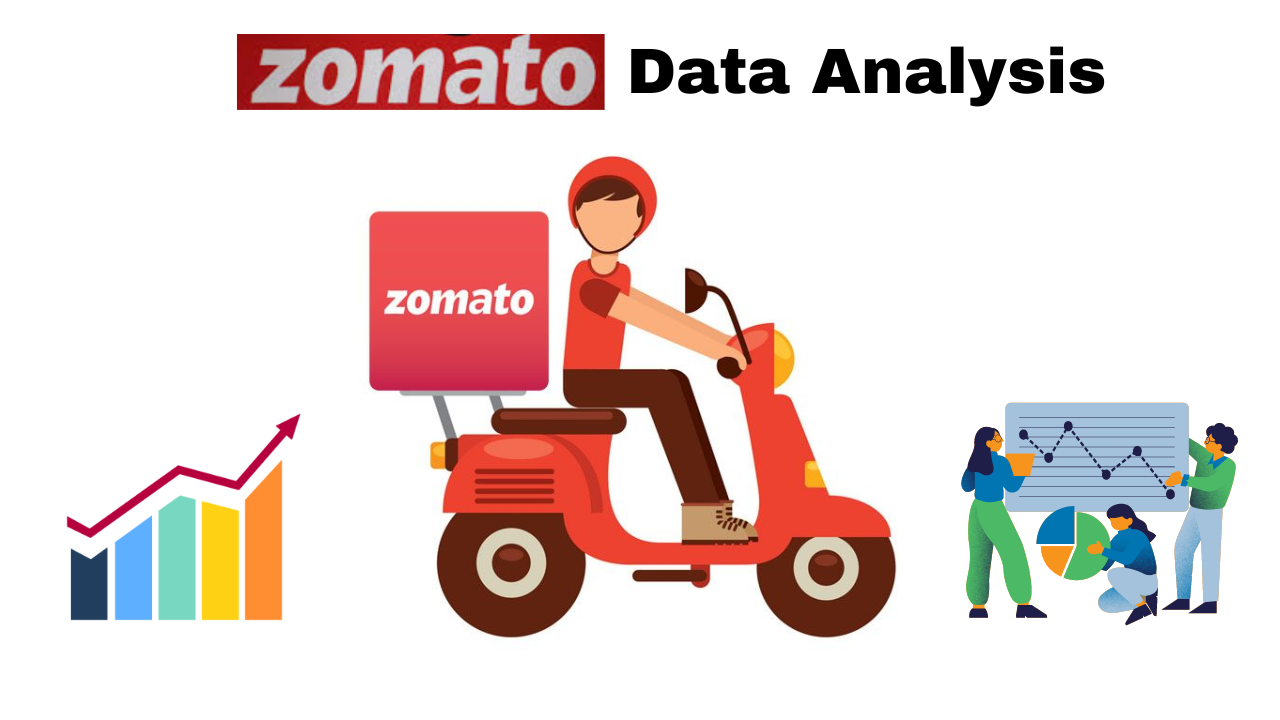

<div style="border-radius: 15px; padding: 10px; background-color: #0B1E47; border: 3px solid #ffffff; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); border-radius:10px; border-style: solid; border-color: #36FF00;">
    <h1 style="color: #ffff00; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Zomato Data Analysis</h1>
</div>


<a id="table"></a>
<h1 style="background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 2.5em; text-align: center; padding: 5px; border: 1px solid #ffffff; border-radius: 15px 12px;">
    About Dataset
</h1>

<div style="border-radius: 15px; padding: 20px; background-color: #F5F5F5; border: 2px solid #0B1E47; text-align: left; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); margin: 20px;">
    <h2 style="color: #0B1E47; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1); font-weight: bold; margin-bottom: 10px; font-size: 24px;">
        Overview
    </h2>
    <p style="font-size: 16px; color: #333333; line-height: 1.8; margin-bottom: 15px;">
        Zomato has an average of <b>17.5 million monthly transacting customers</b> for its food delivery business. Additionally, the <b>average monthly active food delivery restaurant partners</b> on Zomato's platform have also increased by <b>8.7% year-on-year</b>, growing from <b>208,000</b> to <b>226,000</b>.
    </p>
    <p style="font-size: 16px; color: #333333; line-height: 1.8; margin-bottom: 15px;">
        This dataset provides insights into Zomato's food delivery operations, including restaurant types, customer preferences, votes, ratings, and approximate costs for two people. Through analyzing this data, we can uncover key trends in online ordering, customer behavior, and restaurant popularity.
    </p>
</div>


<a id="1"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 0px 0px; margin: 0; font-weight: 00;">IMPORTING LIBRARIES</p>


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\vivek\E.D.A.----Zomato-Data-Analysis\Zomato data .csv")     
df.sample(5)

In [ ]:
df.shape

In [ ]:
dict_counts={}
for i in df.columns:
    dict_counts[i]=df[i].value_counts().shape[0]
    
pd.DataFrame(dict_counts,index=['Unique']).T.style.background_gradient(cmap='bwr')

In [ ]:
df.info()

In [ ]:
df.describe()

<a id="3"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 5px px; margin: 0; font-weight: 500;">PREPROCESSING</p>
 

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
# Remove the '/5' from the 'rate' column and convert to float

df['rate'] = df['rate'].str.replace('/5', '').astype(float)

In [ ]:
df

In [ ]:
df.info()

<a id="3"></a>
<p style="padding: 10px; background-color: #0B1E47; color: #ffffff; font-family: 'Times New Roman', serif; font-size: 1.5em; text-align: center; border: 3px solid #ffffff; border-radius: 5px px; margin: 0; font-weight: 500;">EXPLORATORY  DATA  ANALYSIS</p>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">1) What type of restaurant do the majority of customers order from?</h2> 
</div>

In [ ]:
type_counts = df['listed_in(type)'].value_counts()

plt.figure(figsize=(10, 4))
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

plt.title('Majority of Customer Order ')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Orders')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT :</b>
    <ul>
        <li>The majority of customers prefer ordering from <b>Dining</b> restaurants, with a total of <b>110</b> orders.</li>
        <li><b>Cafes</b> follow as the second most popular type, with <b>23</b> orders.</li>
        <li><b>Other</b> types of restaurants have <b>8</b> orders.</li>
        <li><b>Buffet</b> restaurants are the least preferred with <b>7</b> orders.</li>
    </ul>
</div>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">2) How many votes has each type of restaurant received from customers?</h2> 
</div>

In [ ]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum()

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x=votes_by_type.index, y=votes_by_type.values, marker='o', color='b')

plt.title('Number of Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Votes')


for i, value in enumerate(votes_by_type.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.show()

<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT</b>
    <ul>
        <li>The majority of votes are received by <b>Dining</b> restaurants, with a total of <b>20,363</b> votes.</li>
        <li><b>Other</b> types of restaurants follow with <b>9,367</b> votes.</li>
        <li><b>Cafes</b> have <b>6,434</b> votes.</li>
        <li><b>Buffet</b> restaurants have the fewest votes, with <b>3,028</b> votes.</li>
    </ul>
</div>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">3) What are the ratings that the majority of restaurants have received?</h2> 
</div>

In [ ]:
ratings_count = df['rate'].value_counts().sort_index()

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=ratings_count.index, y=ratings_count.values, palette='Blues')

plt.title('Distribution of Ratings for Restaurants')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Number of Restaurants')

for i, value in enumerate(ratings_count.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.show()

<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT</b>
    <ul>
        <li>The majority of restaurants have received a rating of <strong>3.8</strong>, which is the most frequent rating with <strong>20</strong> occurrences. This indicates that the average customer satisfaction level is relatively high but not exceptional.</li>
        <li>Additionally, ratings of <strong>3.7</strong> and <strong>3.3</strong> are also common, suggesting a general concentration of ratings in the mid to upper range of the scale.</li>
        <li>Most restaurants are rated between <strong>3.3</strong> and <strong>4.1</strong>, with <strong>3.8</strong> being the peak, reflecting a generally positive but varied level of customer satisfaction.</li>
    </ul>
</div>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?</h2> 
</div>

In [ ]:
plt.figure(figsize=(15, 4))
ax=sns.countplot(x=df['approx_cost(for two people)'])

for bars in ax.containers:
    ax.bar_label(bars)

<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT</b>
    <ul>
        <li>The majority of couples spend around <strong>300 rupees</strong> on their food orders, with <strong>23 occurrences</strong> at this price point.</li>
        <li>The next most common spending amounts are <strong>200 rupees</strong> and <strong>150 rupees</strong>, each with <strong>16 occurrences</strong>, followed by orders costing <strong>400 rupees</strong> with <strong>15 occurrences</strong>.</li>
        <li>Most couples prefer affordable dining options, as the majority of the spending falls in the range of <strong>200 to 500 rupees</strong> per order.</li>
        <li>This suggests that Zomato can focus on promoting special offers for restaurants with meal options priced between <strong>200 to 500 rupees</strong> to attract more couples who prefer ordering online.</li>
    </ul>
</div>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">5) Which mode (online or offline) has received the maximum rating?</h2> 
</div>

In [ ]:
max_rating_by_mode = df.groupby('online_order')['rate'].max()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=max_rating_by_mode.index, y=max_rating_by_mode.values, palette='viridis')

plt.title('Maximum Rating by Order Mode (Offline vs Online)')
plt.xlabel('Order Mode')
plt.ylabel('Maximum Rating')

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

plt.show()


plt.figure(figsize=(8, 5))
colors = sns.color_palette('pastel')  
plt.pie(max_rating_by_mode.values, labels=max_rating_by_mode.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Maximum Rating by Order Mode ( Offline vs Online )', fontsize=14)

plt.show()


<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT</b>
    <ul>
        <li>Online orders have received the highest rating of <strong>4.6 (51.7%)</strong>, indicating a strong customer preference and satisfaction when ordering online.</li>
        <li>Offline orders, while still well-rated, have received a slightly lower maximum rating of <strong>4.3(48.3%)</strong>.</li>
        <li>This suggests that Zomato's online ordering system is meeting customer expectations more effectively, and future efforts could focus on further enhancing the offline experience to bridge the gap.</li>
    </ul>
</div>


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?</h2> 
</div>

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

plt.title("Heatmap of Orders by Restaurant Type and Order Mode")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

<div class="alert alert-block alert-success" style="color:darkgreen;">
    <b>INSIGHT</b>
    <ul>
        <li><strong>Dining restaurants</strong> received significantly more offline orders, with <strong>77</strong> offline orders compared to only <strong>33</strong> online orders.</li>
        <li>This indicates that customers prefer placing orders in person at dining restaurants, making them a great target for offline offers and promotions.</li>
        <li>Cafes, on the other hand, have a higher proportion of online orders, suggesting a different customer behavior for these types of establishments.</li>
    </ul>
</div>

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">7) Top 10 Restaurants Based on Votes</h2>  
</div>



<!-- Insert the pie chart code here -->


In [ ]:
top_voted = df.sort_values(by='votes', ascending=False).head(10)
plt.figure(figsize=(12, 3))
ax = sns.barplot(x='votes', y='name', data=top_voted, palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

plt.title('Top 10 Restaurants Based on Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant Name')
plt.show()


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">8) Top 10 Restaurants Based on Ratings</h2>  
</div>


In [ ]:
top_rated = df.sort_values(by='rate', ascending=False).head(10)

plt.figure(figsize=(8, 5))
colors = sns.color_palette('viridis', len(top_rated))  # Use the 'viridis' color palette

plt.pie(top_rated['rate'], labels=top_rated['name'], autopct=lambda p: '{:.1f}'.format(p * sum(top_rated['rate']) / 100), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 Restaurants Based on Ratings')
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">9) Top 10 Restaurants Based on Approximate Cost for Two People</h2>  
</div>



In [ ]:
top_costly = df.sort_values(by='approx_cost(for two people)', ascending=False).head(10)

plt.figure(figsize=(8, 5))
colors = sns.color_palette('viridis', len(top_costly))  # Use the 'viridis' color palette

plt.pie(top_costly['approx_cost(for two people)'], labels=top_costly['name'], autopct=lambda p: '{:.0f}'.format(p * sum(top_costly['approx_cost(for two people)']) / 100), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 Restaurants Based on Approximate Cost for Two People')
plt.show()


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffffff; padding: 5px; background-color: #0B1E47; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Project Learning</h2>
</div>


<div class="alert alert-block alert-success" style="color:darkgreen; padding: 20px; margin: 20px 0;">
    <p style="font-size: 16px; line-height: 1.6;">
        This project involved an in-depth analysis of Zomato’s food delivery dataset, focusing on various aspects of restaurant performance and customer behavior. My aim was to derive meaningful insights that could inform Zomato's business strategies and enhance their platform's user experience. The dataset includes details such as restaurant types, customer ratings, online and offline ordering preferences, and approximate costs for two people. Here’s a breakdown of our analysis:
    </p>
    <ul style="font-size: 16px; color: #155724; margin: 20px 0;">
        <li><b>Popular Restaurant Types:</b> We analyzed which types of restaurants—such as Dining, Cafes, Buffets, and Others—are most frequently chosen by customers. This analysis helps identify customer preferences and trends in dining habits.</li>
        <li><b>Votes by Restaurant Type:</b> We aggregated the total number of votes each restaurant type received to gauge its popularity and customer engagement. This insight is useful for understanding which restaurant categories are most favored by users.</li>
        <li><b>Ratings Distribution:</b> We examined the distribution of restaurant ratings to determine the most common ratings. This helps in assessing overall customer satisfaction and identifying trends in how customers rate their dining experiences.</li>
        <li><b>Average Spending:</b> We calculated the average expenditure for online orders. This information provides insights into how much customers typically spend on their orders, which can inform pricing strategies and promotions.</li>
        <li><b>Comparison of Ratings by Order Mode:</b> We compared the ratings received by online and offline orders to understand how each mode affects customer satisfaction. This comparison highlights whether online or offline ordering leads to better-rated experiences.</li>
        <li><b>Offline Orders Analysis:</b> We identified which types of restaurants receive more offline orders. This analysis helps in targeting promotional offers and improving marketing strategies for restaurant types that are more popular for in-person dining.</li>
    </ul>
    <p style="font-size: 16px; color: #155724; line-height: 1.6;">
        By leveraging these insights, Zomato can tailor its marketing strategies, enhance customer experience, and optimize its partnerships with restaurants. By understanding customer preferences, spending habits, and satisfaction levels, Zomato can enhance its service offerings and drive growth on its platform. This analysis contributes to a deeper understanding of consumer behavior and helps in making data-driven decisions for improving service quality and customer satisfaction. This project underscores the importance of data-driven decision-making in the food delivery industry.
    </p>
</div>


<div style="border-radius: 15px; padding: 10px; background-color: #0B1E47; border: 3px solid #ffffff; text-align: center;     box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2); border-radius:10px;
            border-style: solid;
            border-color: #36FF00;">
    <h1 style="color: #ffff00; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Thank you !</h1>
</div>
